In [1]:
suppressMessages(library(dplyr))
suppressMessages(library(ComplexHeatmap))

In [2]:
df <- read.csv('../../results/04_spatial/13_cell_colocalization/healthy.csv') %>%
    subset(select = (-X))

df_healthy <- cor(df, method = "spearman")

In [3]:
df <- read.csv('../../results/04_spatial/13_cell_colocalization/ssc.csv') %>%
    subset(select = (-X))

df_ssc <- cor(df, method = "spearman")

In [4]:
df_healthy

,B.cells,Endothelial,Fibroblasts,Keratinocytes,Langerhans.cells,Macrophages,Mast.cells,Melanocytes,Monocytes,NK.cells,Neural,Pericytes,Plasma.cells,Smooth.Muscle,T.cells,cDC,pDC
B.cells,1.000000000,-0.3244470,-0.5257900,0.6058141,0.61425825,-0.44109247,-0.004819707,0.50492416,0.05071844,-0.15051647,-0.20445026,-0.41122931,0.37763146,-0.4377596,-0.3564770,-0.3297133,0.74065317
Endothelial,-0.324447008,1.0000000,0.2517691,-0.6601713,-0.27510707,0.35877898,0.294156562,-0.24784258,0.15050935,0.41933099,0.50431483,0.68018238,-0.12039004,0.6100645,0.4972151,0.4391296,-0.33236060
Fibroblasts,-0.525790020,0.2517691,1.0000000,-0.6094382,-0.43030473,0.52203823,0.229741616,-0.34755053,0.13763546,0.28337120,0.32151542,0.27656401,-0.27854223,0.3629185,0.4354001,0.4391638,-0.44711358
Keratinocytes,0.605814067,-0.6601713,-0.6094382,1.0000000,0.48343630,-0.48641568,-0.241684111,0.45590586,-0.15803760,-0.43282643,-0.51452349,-0.63975798,0.26969621,-0.6813324,-0.5350718,-0.4596326,0.55014493
Langerhans.cells,0.614258250,-0.2751071,-0.4303047,0.4834363,1.00000000,-0.37393288,0.044704447,0.48671410,0.11689862,-0.04610688,-0.09600022,-0.37109639,0.40152755,-0.3464862,-0.2344785,-0.1892858,0.57402230
Macrophages,-0.441092466,0.3587790,0.5220382,-0.4864157,-0.37393288,1.00000000,0.130546409,-0.36562917,0.06841283,0.27061616,0.21880389,0.52397608,-0.35624250,0.3112900,0.5192913,0.5005030,-0.40784006
Mast.cells,-0.004819707,0.2941566,0.2297416,-0.2416841,0.04470445,0.13054641,1.000000000,0.14155090,0.28998705,0.38934946,0.40373663,0.16451932,0.12153150,0.2825457,0.3723798,0.3664023,0.03208819
Melanocytes,0.504924159,-0.2478426,-0.3475505,0.4559059,0.48671410,-0.36562917,0.141550898,1.00000000,0.07086295,-0.04969165,-0.07030679,-0.39138772,0.41135103,-0.2877341,-0.1989060,-0.1334542,0.50973938
Monocytes,0.050718437,0.1505093,0.1376355,-0.1580376,0.11689862,0.06841283,0.289987052,0.07086295,1.00000000,0.32652534,0.24355610,0.05268709,0.18744381,0.1946392,0.2071160,0.2385855,0.10591082
NK.cells,-0.150516473,0.4193310,0.2833712,-0.4328264,-0.04610688,0.27061616,0.389349457,-0.04969165,0.32652534,1.00000000,0.46985753,0.33156385,0.04214193,0.4194985,0.5694725,0.4152545,-0.10540716


In [74]:
options(repr.plot.height = 10, repr.plot.width = 11)

ht1 <- Heatmap(df_healthy, 
               column_title = 'Healthy',
               rect_gp = gpar(col = "black", lwd = 0.25),
                cell_fun = function(i, j, x, y, width, height, fill) {
                    grid.text(round(df_healthy[i, j], 2), x, y, gp = gpar(fontsize = 10))}
              )

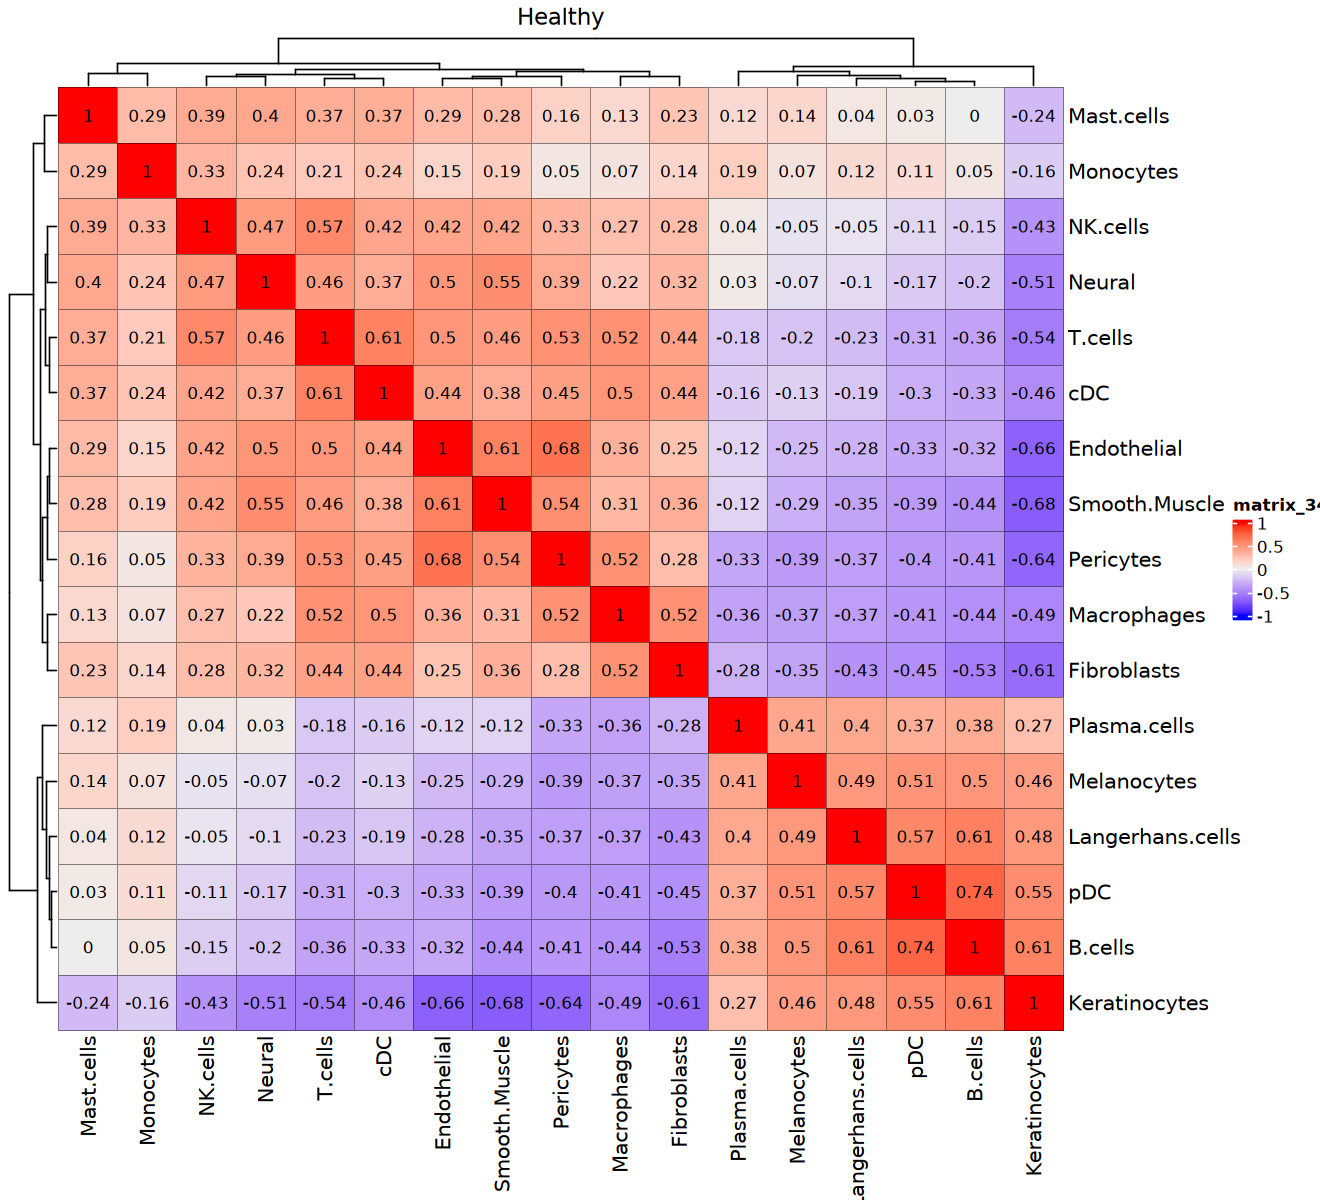

In [75]:
draw(ht1)

In [76]:
ht2 <- Heatmap(df_ssc, 
               cluster_rows = FALSE,
               cluster_columns = FALSE,
               column_title = 'SSc',
               column_order = column_order(ht1),
               row_order = row_order(ht1),
               rect_gp = gpar(col = "black", lwd = 0.25),
                cell_fun = function(i, j, x, y, width, height, fill) {
                    grid.text(round(df_ssc[i, j], 2), x, y, gp = gpar(fontsize = 10))}
              )

Warning message:
“The heatmap has not been initialized. You might have different results
if you repeatedly execute this function, e.g. when row_km/column_km was
set. It is more suggested to do as `ht = draw(ht); row_order(ht)`.”
Warning message:
“The heatmap has not been initialized. You might have different results
if you repeatedly execute this function, e.g. when row_km/column_km was
set. It is more suggested to do as `ht = draw(ht); column_order(ht)`.”


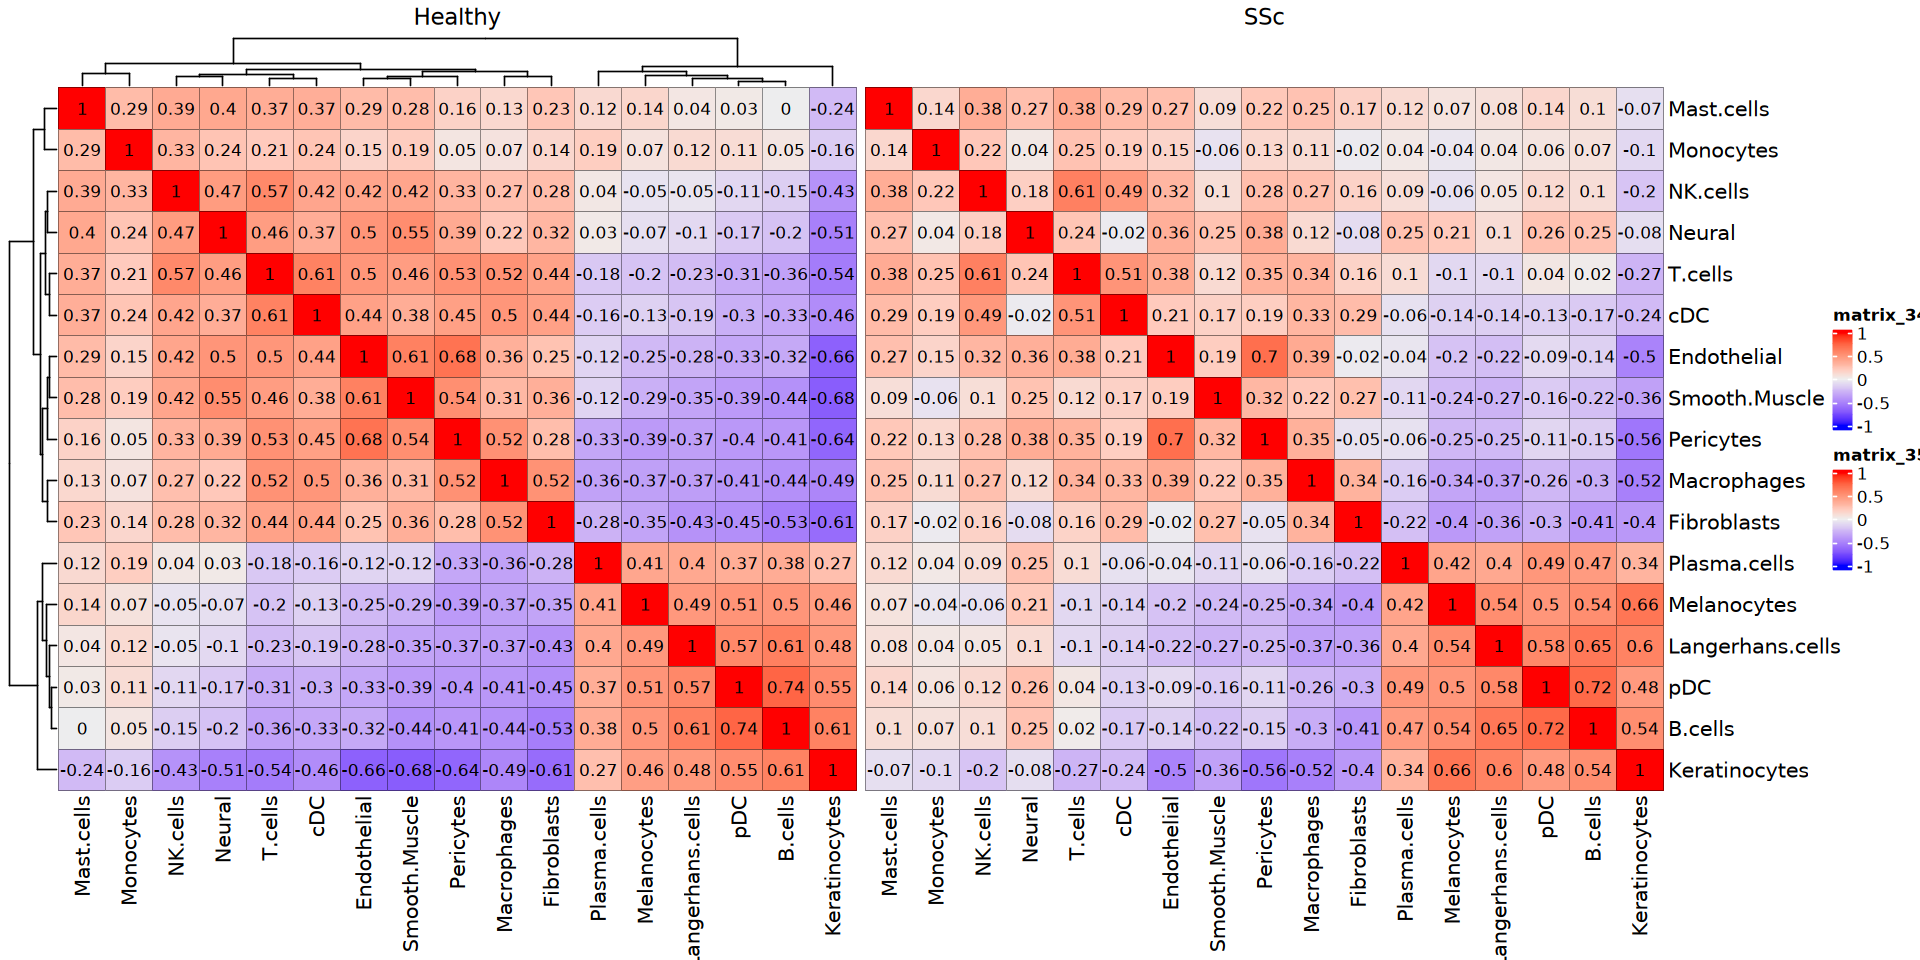

In [77]:
options(repr.plot.height = 8, repr.plot.width = 16)

ht_list = ht1 + ht2
draw(ht_list)